In [35]:
#==================================
# 1️⃣ Improtar la librería de Pandas
#==================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
#==================================
# 2️⃣ Cargar los archivos CSV
#==================================
# Usamos pd.read_csv
ventas_df = pd.read_csv("ventas.csv")
inventarios_df = pd.read_csv("inventarios.csv")
satisfaccion_df = pd.read_csv("satisfaccion.csv")

In [37]:
#==================================
# Limpiar Datos (Eliminar filas con valores nulos)
#==================================
ventas_df = ventas_df.dropna()
inventarios_df = inventarios_df.dropna()
satisfaccion_df = satisfaccion_df.dropna()


In [38]:
#==================================
# Análisis de ventas totales
#==================================
ventas_df["Ventas_Totales"] = ventas_df ["Cantidad_Vendida"] * ventas_df["Precio_Unitario"]
print(ventas_df)
print ("===Ventas Totales===")
ventas_totales = ventas_df.groupby("ID_Tienda")["Ventas_Totales"].sum().reset_index()
print (ventas_totales)

   ID_Tienda    Producto  Cantidad_Vendida  Precio_Unitario Fecha_Venta  \
0          1  Producto A                20              100  2023-01-05   
1          1  Producto B                15              200  2023-01-06   
2          2  Producto A                30              100  2023-01-07   
3          2  Producto C                25              300  2023-01-08   
4          3  Producto A                10              100  2023-01-09   
5          3  Producto B                40              200  2023-01-10   
6          4  Producto C                35              300  2023-01-11   
7          4  Producto A                25              100  2023-01-12   
8          5  Producto B                20              200  2023-01-13   
9          5  Producto C                30              300  2023-01-14   

   Ventas_Totales  
0            2000  
1            3000  
2            3000  
3            7500  
4            1000  
5            8000  
6           10500  
7            2

In [39]:
#==================================
# Rotación de Inventarios
#==================================
ventas_inventarios = pd.merge(ventas_df,inventarios_df, on = ["ID_Tienda","Producto"], how = "inner")
#==================================
# merge combilas las filas de ambos DF
# on = ["ID_Tienda", "Producto"] Clave de Union obligatoria que existe en ambos DF
# how = "inner" solo conserva las filas que tienen coincidencias en ambos
#==================================
print ("===================Ventas de Inventario==================")
print (ventas_inventarios)
ventas_inventarios["Rotación_inventario"] = ((ventas_inventarios["Cantidad_Vendida"]*100)//ventas_inventarios["Stock_Disponible"])
print (ventas_inventarios)

#==================================
# Rotación de Inventarios por tienda
#==================================

print ("===Rotación mínima de inventarios por producto===")
print (ventas_inventarios["Rotación_inventario"] <= 10)
rot_ventas = ventas_inventarios.groupby("ID_Tienda")["Rotación_inventario"].min().reset_index()
# Se filtra por el producto menos vendido de cada tienda, atendiendo a la pregunta
rot_ventas = rot_ventas["Rotación_inventario"] <= 10
print ("===Tiendas con rotación insuficiente===")
print (rot_ventas)


===================Ventas de Inventario==================
   ID_Tienda    Producto  Cantidad_Vendida  Precio_Unitario Fecha_Venta  \
0          1  Producto A                20              100  2023-01-05   
1          1  Producto B                15              200  2023-01-06   
2          2  Producto A                30              100  2023-01-07   
3          2  Producto C                25              300  2023-01-08   
4          3  Producto A                10              100  2023-01-09   
5          3  Producto B                40              200  2023-01-10   
6          4  Producto C                35              300  2023-01-11   
7          4  Producto A                25              100  2023-01-12   
8          5  Producto B                20              200  2023-01-13   
9          5  Producto C                30              300  2023-01-14   

   Ventas_Totales  Stock_Disponible Fecha_Actualización  
0            2000                50          2023-01-05  


In [40]:
#==================================
# Analizar la satisfacción del cliente y filtrar las tiendas con una satisfacción menor al 60%.
#==================================
# Agregar columna de verificación de meta de satisfacción a satisfaccion_df
satisfaccion_df["Meta_satisfacción"] = satisfaccion_df["Satisfacción_Promedio"] >= 60
print (satisfaccion_df)

   ID_Tienda  Satisfacción_Promedio Fecha_Evaluación  Meta_satisfacción
0          1                     85       2023-01-15               True
1          2                     90       2023-01-15               True
2          3                     70       2023-01-15               True
3          4                     65       2023-01-15               True
4          5                     55       2023-01-15              False


In [41]:
#==================================
## Realizar cálculos numéricos con Numpy:
#==================================
# Calcular la mediana de las ventas totales.
print (f"la mediana de las ventas totales es: {int(np.median(ventas_df["Ventas_Totales"]))}")

# Calcular la desviación estándar de las ventas.
print (f"La desviación standard de las ventas totales es: {int(np.std(ventas_df["Ventas_Totales"]))}")


la mediana de las ventas totales es: 3500
La desviación standard de las ventas totales es: 3189


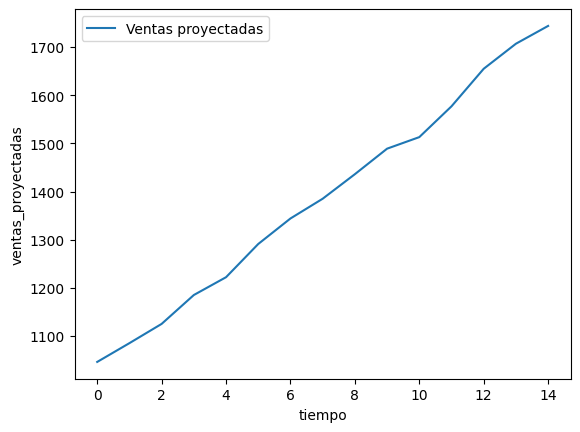

In [ ]:
#Generador de puntos ()
tiempo =np. arange(15)
ventas_aleatorias = np.random.randint(10,60,(1,15))


#proyectar las ventas con la tendencia lineal
pendiente = 50
intereseccion = 1000
ventas_proyectadas = pendiente * tiempo + intereseccion + ventas_aleatorias

import matplotlib.pyplot as plt
plt.plot(tiempo, ventas_proyectadas.flatten(), label="Ventas proyectadas")
plt.xlabel("tiempo")
plt.ylabel("ventas_proyectadas")
plt.legend ()
plt.show()
